In [299]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv


In [300]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

In [301]:
df = pd.read_csv("/kaggle/input/widsdatathon2022/train.csv")

In [302]:
# Set the option to display all the columns
pd.options.display.max_rows = None

In [303]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [304]:
df.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
53051,6,State_6,Residential,Multifamily_Uncategorized,92100.0,1927.0,71.0,3.4,11,34.451613,...,96,17,0,0,1.0,1.0,1.0,NaN,76.490437,53051
61924,6,State_6,Residential,Multifamily_Uncategorized,101287.0,1989.0,10.0,42.7,11,34.451613,...,96,17,0,0,NaN,NaN,NaN,131.0,110.596994,61924
14217,6,State_4,Residential,Multifamily_Uncategorized,436435.0,1988.0,18.0,205.7,-2,25.166667,...,113,40,0,0,NaN,NaN,NaN,267.0,90.354362,14217
9710,6,State_2,Commercial,Education_Other_classroom,65000.0,1886.0,5.0,3.0,11,32.000000,...,109,38,0,0,NaN,NaN,NaN,NaN,54.395175,9710
30003,3,State_6,Residential,Multifamily_Uncategorized,122995.0,1962.0,NaN,15.2,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,71.640055,30003


In [305]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [306]:
target_var = 'site_eui'

In [307]:
df.shape

(75757, 64)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [309]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [310]:
# categorical columns
df.describe(include=['O']).T

,count,unique,top,freq
State_Factor,75757,7,State_6,50840
building_class,75757,2,Residential,43558
facility_type,75757,60,Multifamily_Uncategorized,39455


In [311]:
df.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
year_built                    1837
energy_star_rating           26709
ELEVATION                        0
january_min_temp                 0
january_avg_temp                 0
january_max_temp                 0
february_min_temp                0
february_avg_temp                0
february_max_temp                0
march_min_temp                   0
march_avg_temp                   0
march_max_temp                   0
april_min_temp                   0
april_avg_temp                   0
april_max_temp                   0
may_min_temp                     0
may_avg_temp                     0
may_max_temp                     0
june_min_temp                    0
june_avg_temp                    0
june_max_temp                    0
july_min_temp                    0
july_avg_temp                    0
july_max_temp       

In [312]:
na_counts = df.isna().sum()
na_counts = na_counts[na_counts != 0] # keep only columns with missing values (pandas feature)
print(na_counts.sort_values(ascending=False))

days_with_fog                45796
direction_peak_wind_speed    41811
direction_max_wind_speed     41082
max_wind_speed               41082
energy_star_rating           26709
year_built                    1837
dtype: int64


In [313]:
df.duplicated().sum()

0

In [314]:
# Select only object columns
cat_cols = df.select_dtypes(include='object').columns

# Calculate the number of unique values for each categorical column
cat_counts = df[cat_cols].nunique()
print(cat_counts)

State_Factor       7
building_class     2
facility_type     60
dtype: int64


In [315]:
df['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

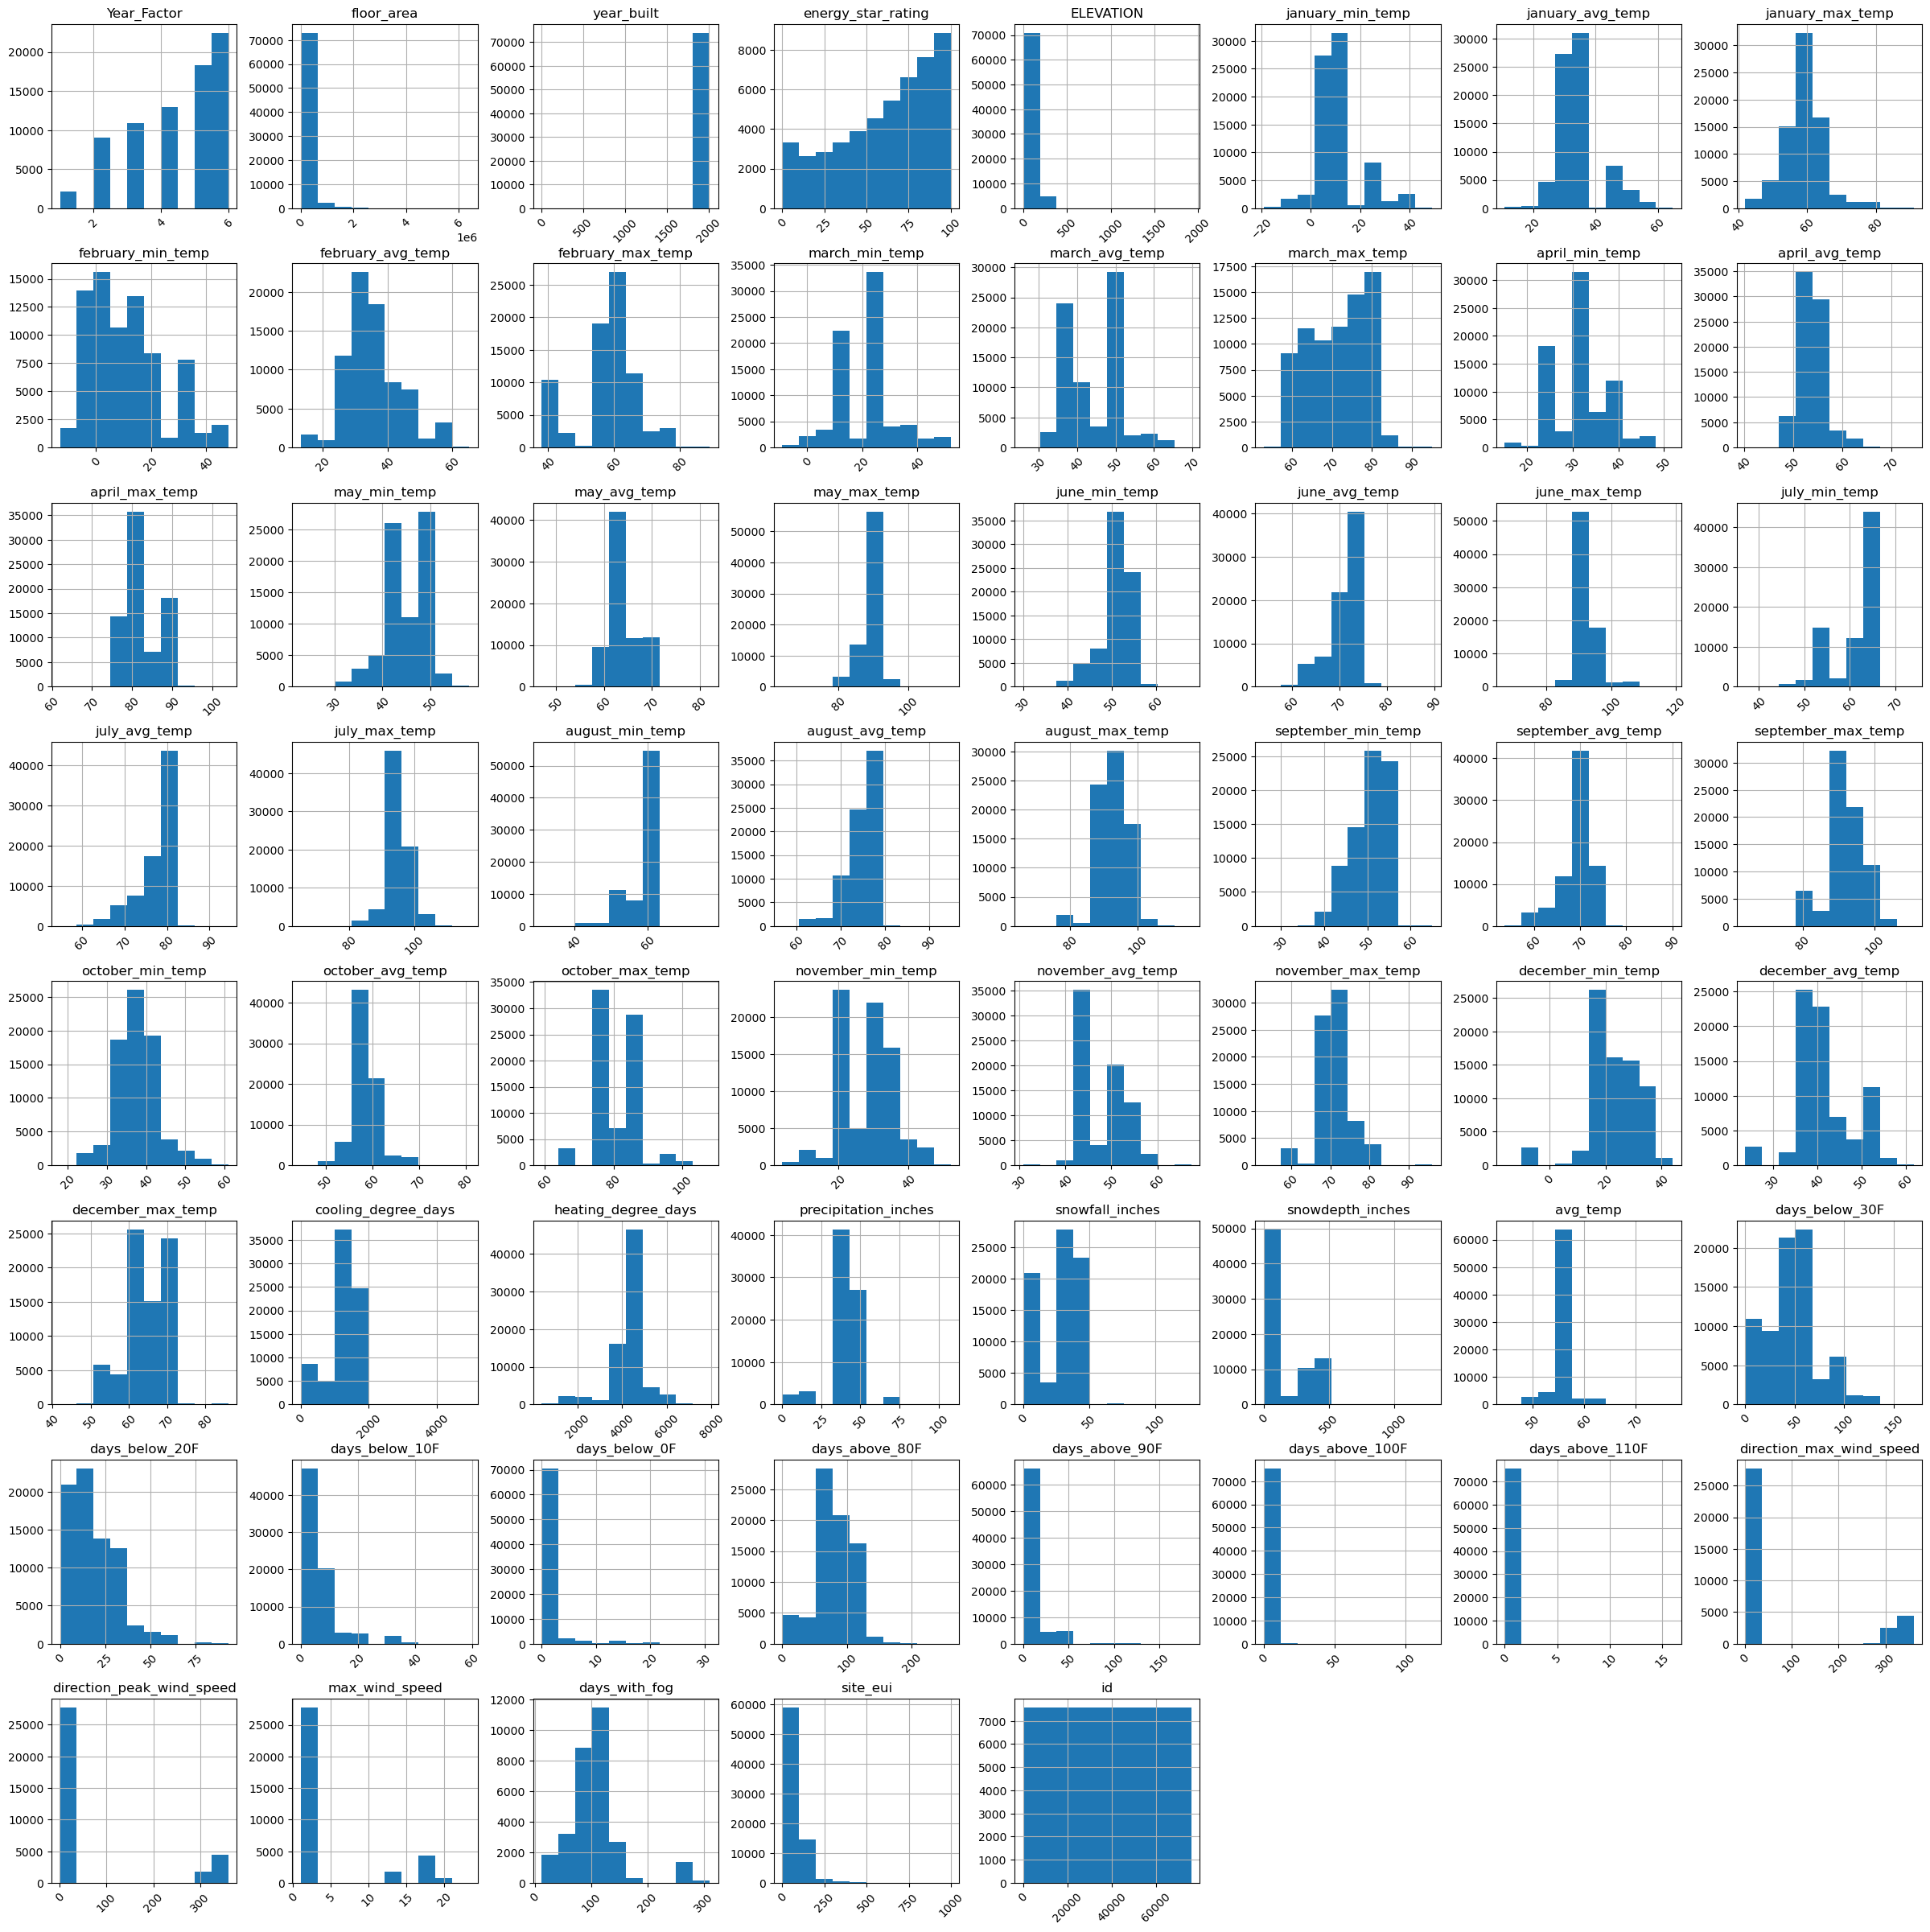

In [316]:
# DATA VISUALIZATION

df.hist(figsize=(30,30), xrot=45)
plt.show()

In [317]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [318]:
df.shape

(75757, 64)

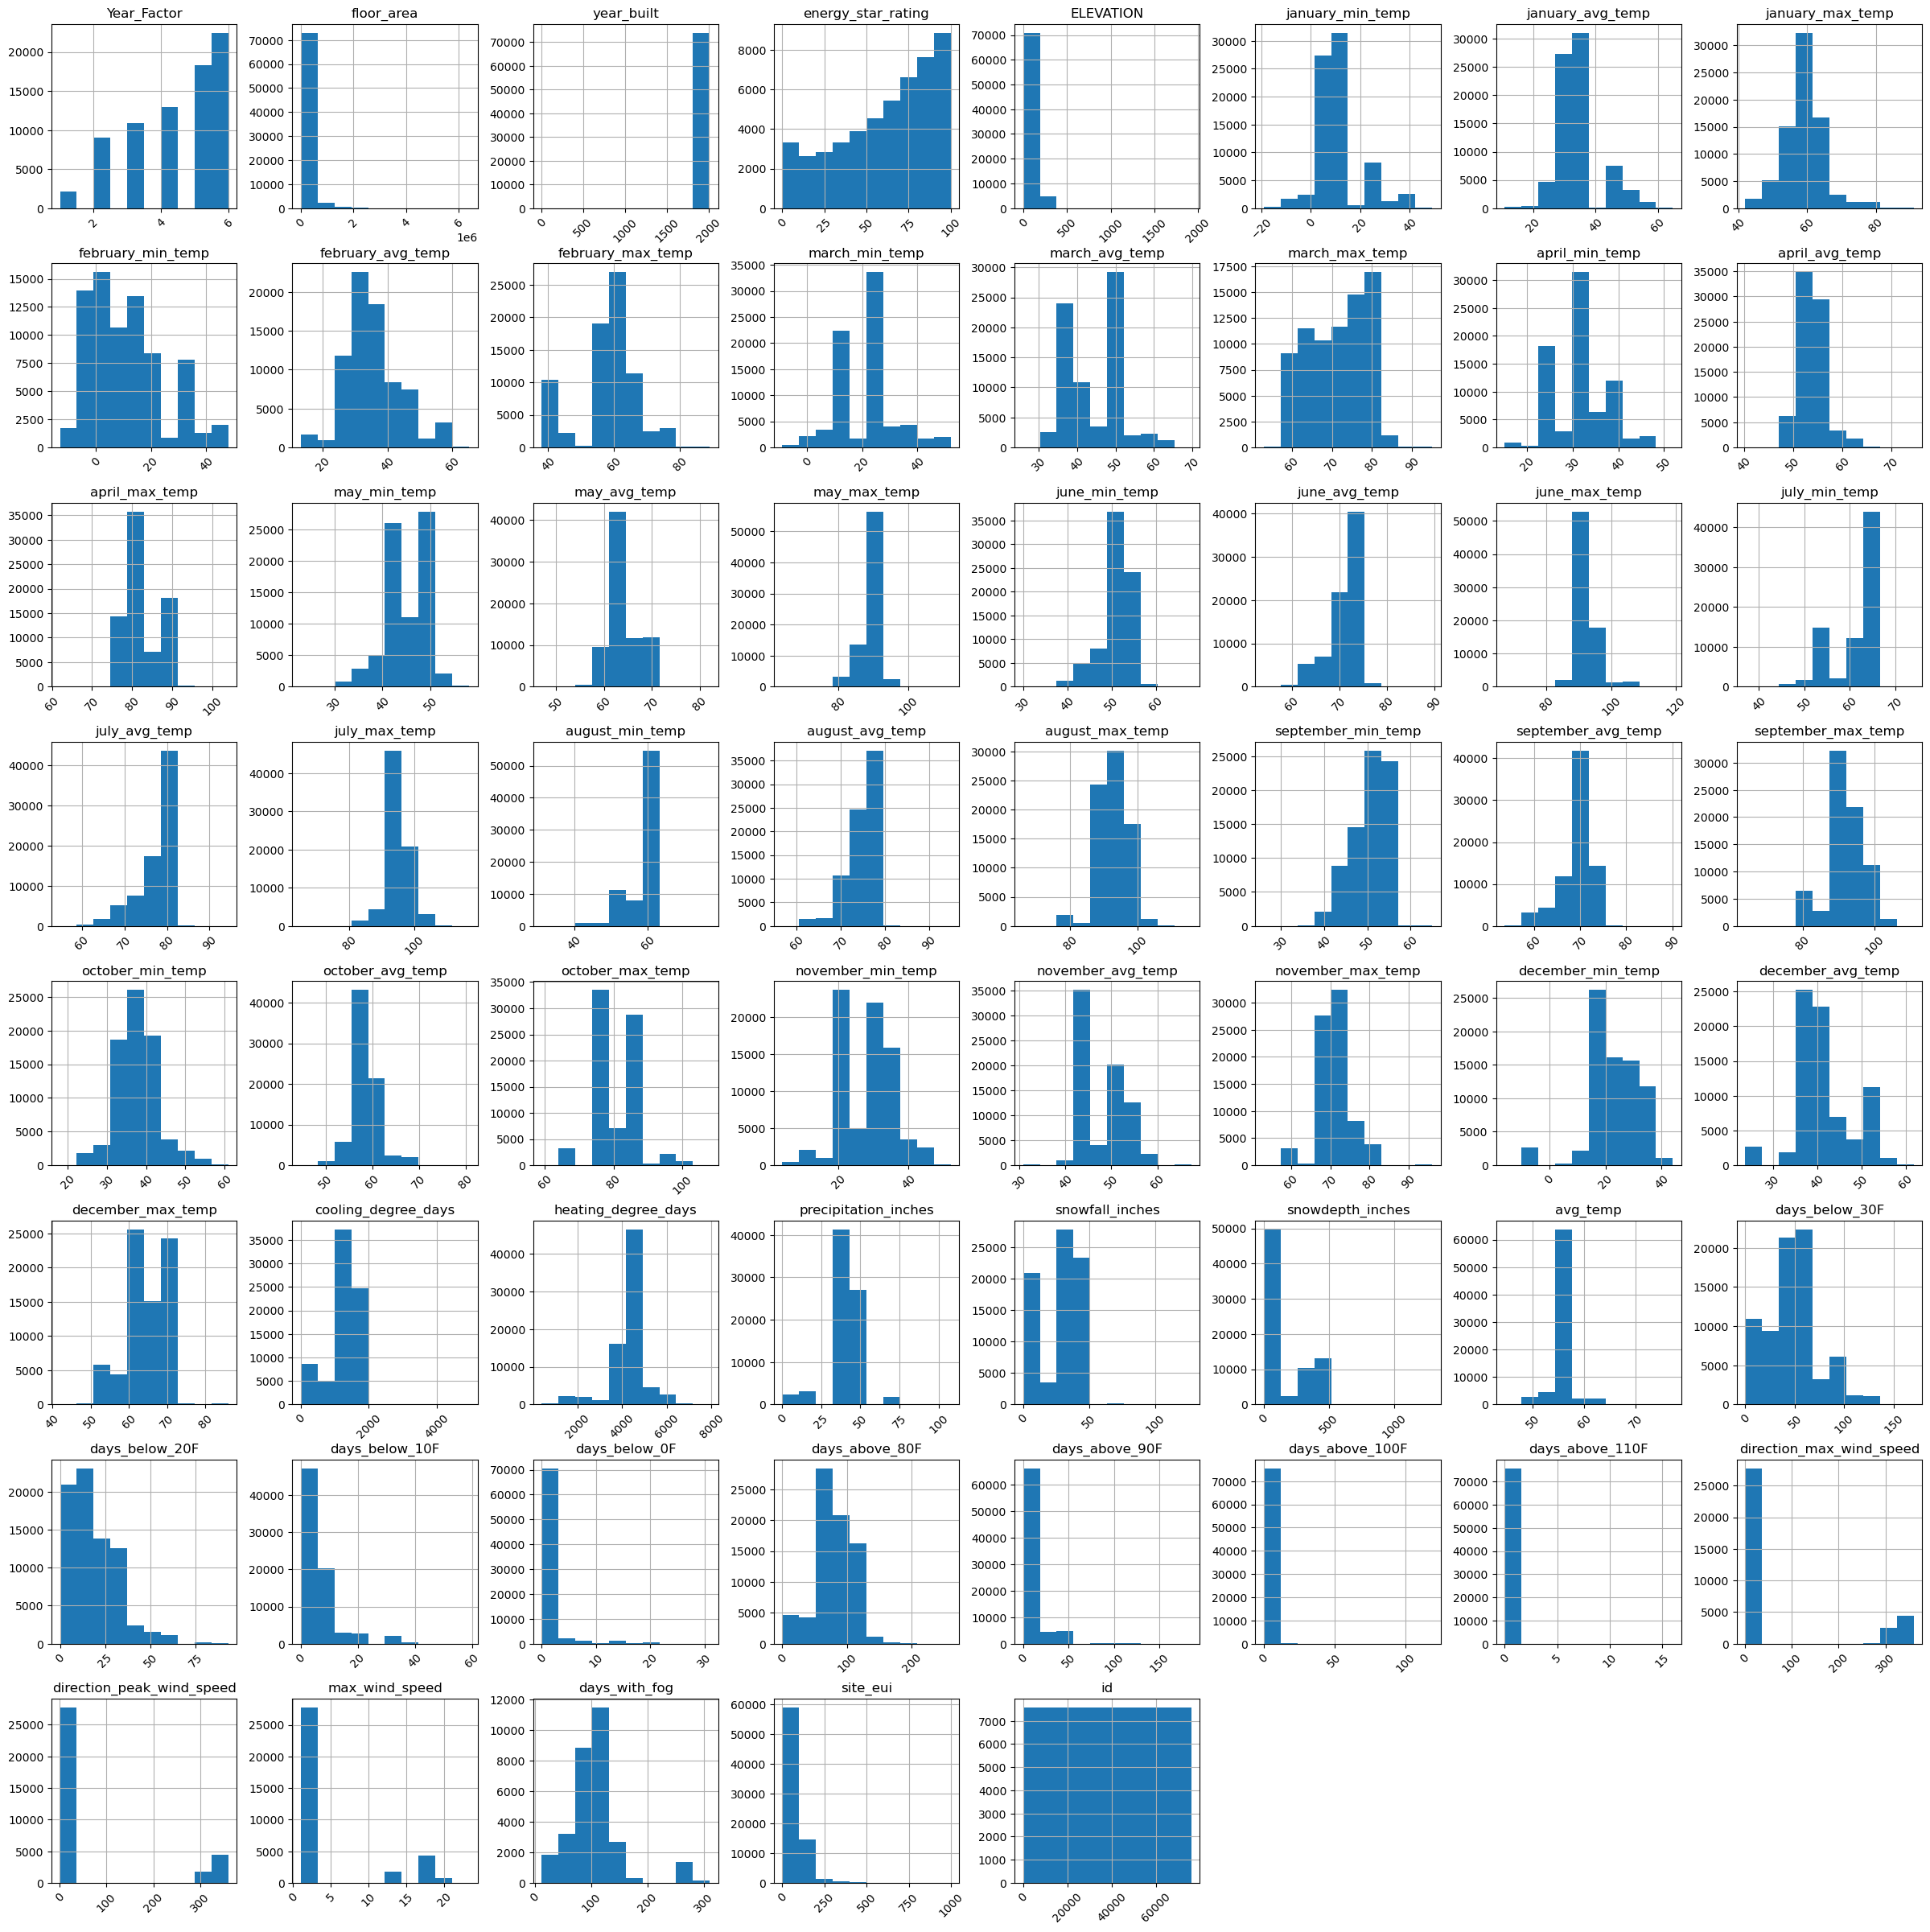

In [319]:
df.hist(figsize=(30,30), xrot=45)
plt.show()

In [320]:
df2 = df.copy(deep=True)

In [321]:
cols_to_drop = [col for col in df.columns if 'min_temp' in col or 'max_temp' in col]
df2 = df.drop(cols_to_drop, axis=1)  

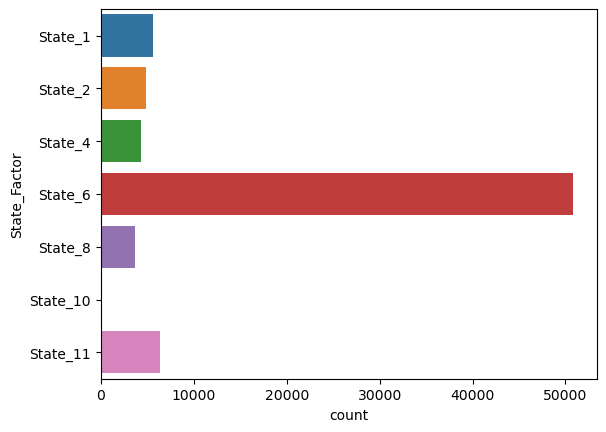

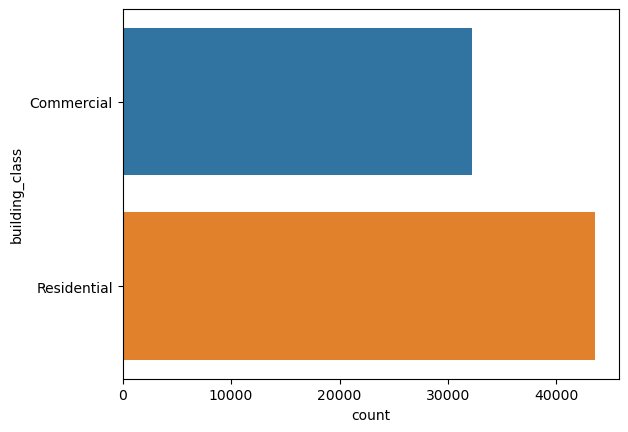

In [322]:
# countplot for categorical features
for col in df2.select_dtypes(include='object'):
    # choose the columns that have <= 10 unique values
    if df2[col].nunique() <= 50:
        sns.countplot(y=col, data=df2)
        plt.show()

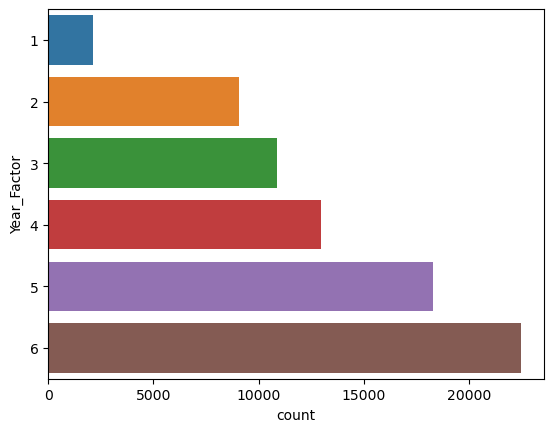

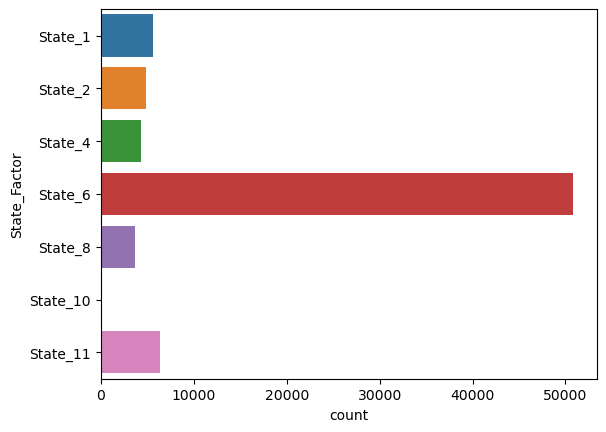

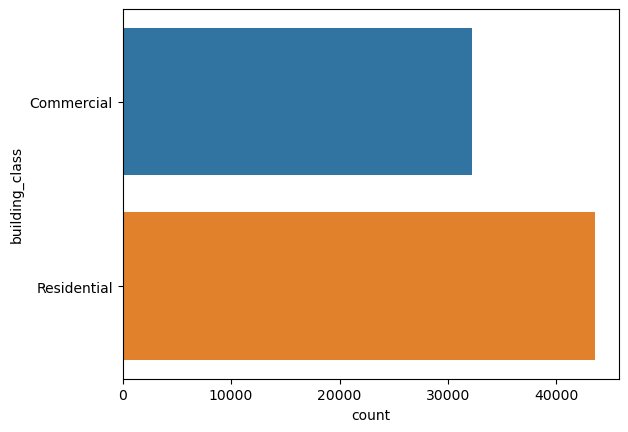

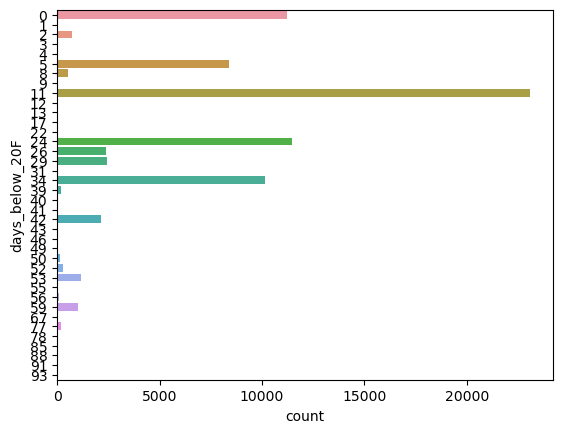

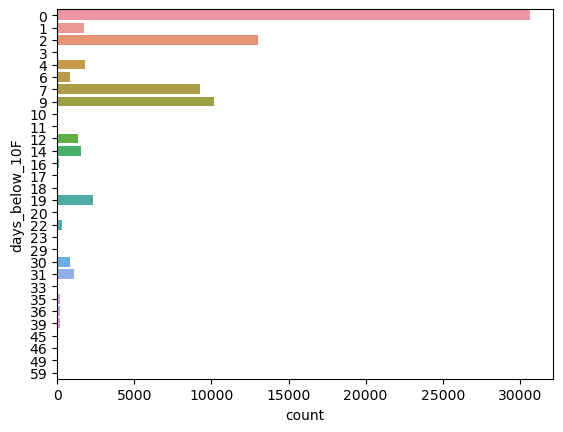

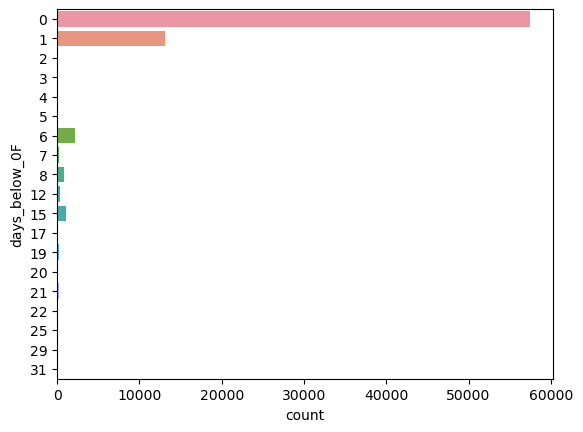

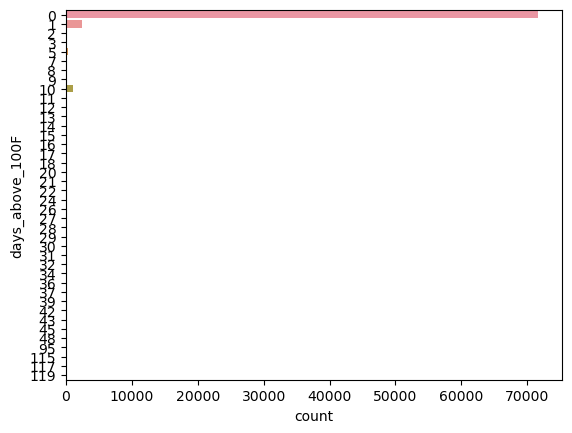

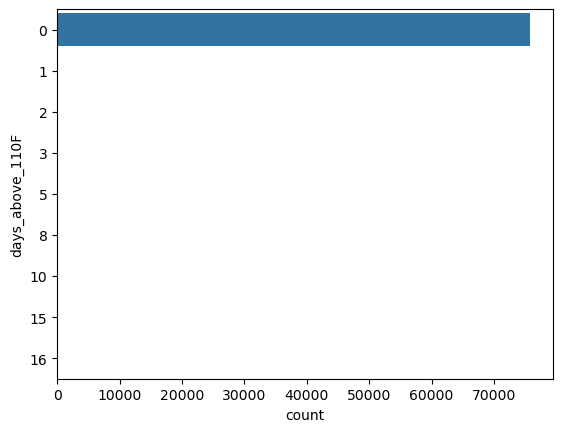

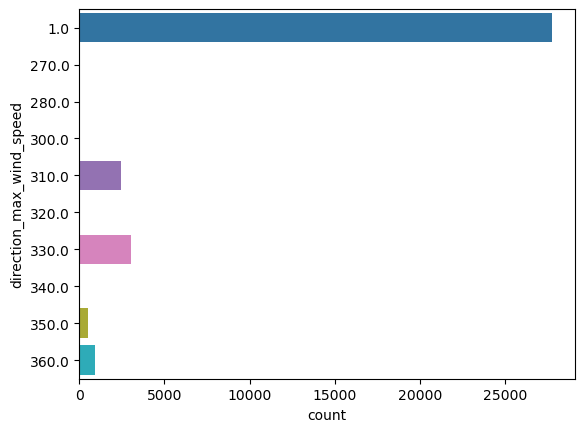

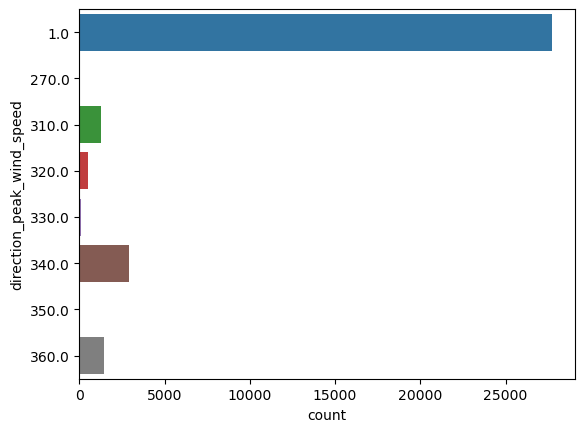

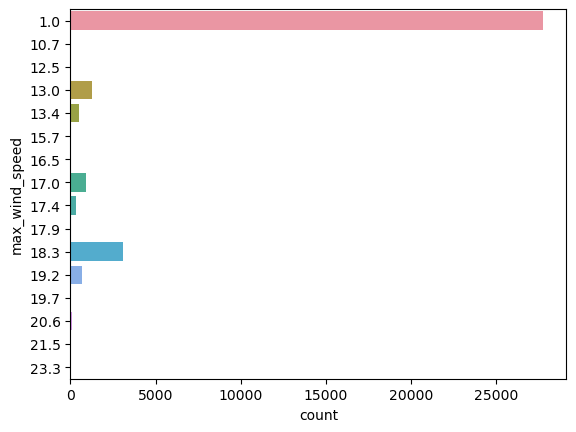

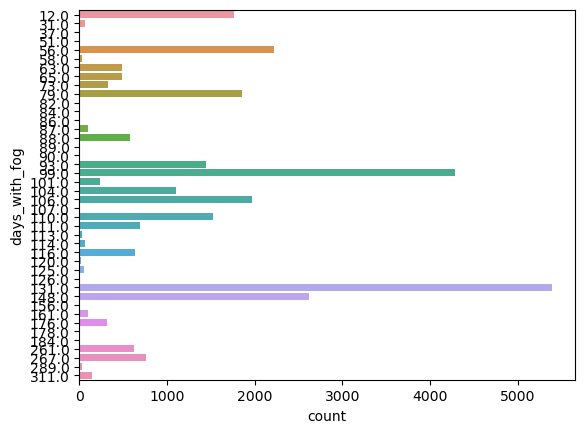

In [323]:
# countplot for numerical features
for col in df2:
    # choose the columns that have <= 10 unique values
    if df2[col].nunique() <= 50:
        sns.countplot(y=col, data=df2)
        plt.show()

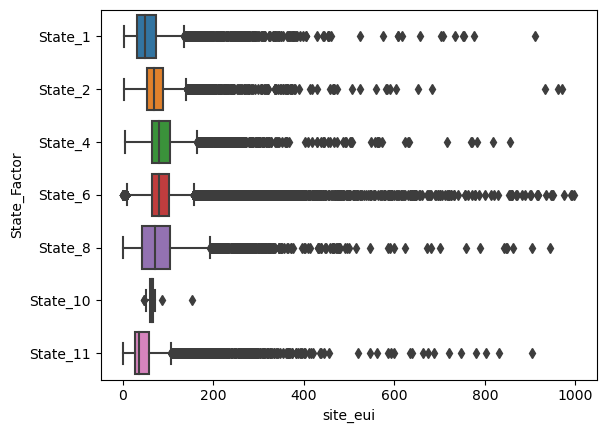

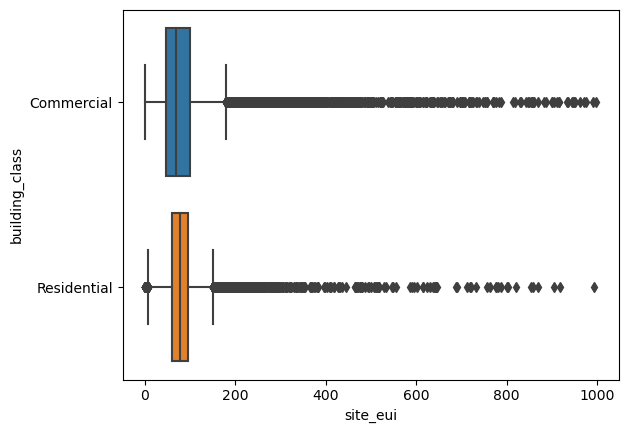

In [324]:
# Segment the target variable by categorical features
# box plot
for column in df2.select_dtypes(include='object'):
    if df2[column].nunique() < 10:
        sns.boxplot(y=column, x=target_var, data=df2)
        plt.show()

In [325]:
# Group numeric features by each categorical feature
# how each numeric feature changes w.r.t the categorical features
for column in df2.select_dtypes(include='object'):
    if df2[column].nunique() < 10:
        display(df2.groupby(column).mean(numeric_only=True))

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
State_Factor,,,,,,,,,,,,,,,,,,,,,
State_1,3.899786,128228.457636,1938.277485,72.977740,52.136472,50.834385,53.662599,57.249316,59.985412,62.950444,...,73.501424,23.194019,3.450694,0.03293,22.578600,19.356050,2.084148,89.696035,62.196194,2808.5
State_10,4.600000,290734.733333,1970.800000,84.250000,112.573333,35.461290,36.464245,46.537634,58.065556,68.149462,...,118.933333,35.533333,0.266667,0.00000,226.727273,215.818182,12.963636,93.909091,68.597082,69337.0
State_11,5.502339,83815.836868,1968.841966,68.046374,32.585761,44.396064,47.962339,49.997288,54.032598,59.102170,...,32.386775,2.497193,0.000000,0.00000,1.000000,1.000000,1.000000,261.000000,53.989234,72550.5
State_2,4.775611,201246.396756,1968.620067,59.889637,35.659823,30.901117,31.919998,41.892927,55.110362,65.378679,...,104.529049,25.069185,0.008417,0.00000,1.000000,1.000000,1.000000,108.956044,77.873978,8053.0
State_4,5.553488,299751.300465,1961.821445,59.278643,203.825535,23.165362,24.122615,39.970914,48.797218,61.038191,...,91.584186,22.730233,0.000000,0.00000,253.953771,261.642336,13.609246,194.842214,95.199291,12638.5
State_6,4.116365,164636.336743,1948.763073,59.212989,23.885541,32.876918,33.695891,43.366598,53.544821,64.590207,...,86.370732,12.616660,0.034343,0.00000,64.206293,59.643484,4.055997,100.219865,87.481012,40208.5
State_8,4.650365,181829.487490,1957.419486,57.087383,60.756444,28.878192,29.597404,39.248734,51.273855,62.311067,...,94.408808,15.377736,0.000000,0.00000,132.468481,137.296562,7.739971,91.743008,87.416018,67479.0


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
building_class,,,,,,,,,,,,,,,,,,,,,
Commercial,4.412590,204340.896196,1951.722977,64.394552,50.571465,35.405064,37.070228,45.526664,54.209422,63.273349,...,82.134973,15.661604,0.631231,0.005746,57.065799,53.572315,3.798924,108.425213,85.755239,34336.770334
Residential,4.334611,137629.533248,1952.723059,58.071852,31.326734,33.501320,34.385930,43.687659,53.471020,64.089387,...,83.134740,12.873800,0.019560,0.000000,71.272555,67.360448,4.385468,109.551442,80.240957,40495.752284


In [326]:
# Group numeric features by each categorical feature
# how each numeric feature changes w.r.t the categorical features
for column in df2.select_dtypes(include='object'):
    if df2[column].nunique() < 10:
        display(df2.groupby(column).mean(numeric_only=True))

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
State_Factor,,,,,,,,,,,,,,,,,,,,,
State_1,3.899786,128228.457636,1938.277485,72.977740,52.136472,50.834385,53.662599,57.249316,59.985412,62.950444,...,73.501424,23.194019,3.450694,0.03293,22.578600,19.356050,2.084148,89.696035,62.196194,2808.5
State_10,4.600000,290734.733333,1970.800000,84.250000,112.573333,35.461290,36.464245,46.537634,58.065556,68.149462,...,118.933333,35.533333,0.266667,0.00000,226.727273,215.818182,12.963636,93.909091,68.597082,69337.0
State_11,5.502339,83815.836868,1968.841966,68.046374,32.585761,44.396064,47.962339,49.997288,54.032598,59.102170,...,32.386775,2.497193,0.000000,0.00000,1.000000,1.000000,1.000000,261.000000,53.989234,72550.5
State_2,4.775611,201246.396756,1968.620067,59.889637,35.659823,30.901117,31.919998,41.892927,55.110362,65.378679,...,104.529049,25.069185,0.008417,0.00000,1.000000,1.000000,1.000000,108.956044,77.873978,8053.0
State_4,5.553488,299751.300465,1961.821445,59.278643,203.825535,23.165362,24.122615,39.970914,48.797218,61.038191,...,91.584186,22.730233,0.000000,0.00000,253.953771,261.642336,13.609246,194.842214,95.199291,12638.5
State_6,4.116365,164636.336743,1948.763073,59.212989,23.885541,32.876918,33.695891,43.366598,53.544821,64.590207,...,86.370732,12.616660,0.034343,0.00000,64.206293,59.643484,4.055997,100.219865,87.481012,40208.5
State_8,4.650365,181829.487490,1957.419486,57.087383,60.756444,28.878192,29.597404,39.248734,51.273855,62.311067,...,94.408808,15.377736,0.000000,0.00000,132.468481,137.296562,7.739971,91.743008,87.416018,67479.0


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
building_class,,,,,,,,,,,,,,,,,,,,,
Commercial,4.412590,204340.896196,1951.722977,64.394552,50.571465,35.405064,37.070228,45.526664,54.209422,63.273349,...,82.134973,15.661604,0.631231,0.005746,57.065799,53.572315,3.798924,108.425213,85.755239,34336.770334
Residential,4.334611,137629.533248,1952.723059,58.071852,31.326734,33.501320,34.385930,43.687659,53.471020,64.089387,...,83.134740,12.873800,0.019560,0.000000,71.272555,67.360448,4.385468,109.551442,80.240957,40495.752284


In [327]:
# Relationships between numeric features and other numeric features
# Correlations matrix
corrs = df2.corr()
corrs

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.036363,0.084143,-0.005052,0.132855,-0.099628,-0.101799,0.051545,-0.164931,-0.196895,...,0.185233,0.054718,-0.043701,-0.013635,0.231525,0.214651,0.233857,0.619227,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.100878,0.034947,0.097797,-0.137654,-0.120068,-0.098905,-0.100034,0.011626,...,0.049897,0.022583,-0.031415,-0.009205,-0.000018,-0.003984,-0.000922,0.014282,0.073967,-0.090856
year_built,0.084143,0.100878,1.000000,-0.073857,0.047803,-0.032846,-0.020201,-0.029848,-0.077966,-0.079245,...,-0.035519,-0.005065,-0.054164,NaN,0.001168,-0.009591,0.004945,0.084167,0.017162,0.053929
energy_star_rating,-0.005052,0.034947,-0.073857,1.000000,-0.016783,0.149421,0.137479,0.137160,0.100951,-0.072969,...,-0.074993,0.019541,0.059382,NaN,-0.000992,0.002014,-0.000333,0.019387,-0.511012,-0.025448
ELEVATION,0.132855,0.097797,0.047803,-0.016783,1.000000,-0.233452,-0.184543,-0.112014,-0.258460,-0.133906,...,0.062014,0.184423,0.104934,0.077188,0.050804,0.074144,0.040172,0.495345,0.011798,-0.201664
january_avg_temp,-0.099628,-0.137654,-0.032846,0.149421,-0.233452,1.000000,0.911228,0.818900,0.717394,-0.314896,...,-0.462088,0.049163,0.256483,0.048114,-0.267947,-0.257252,-0.271260,-0.108595,-0.167982,-0.051719
february_avg_temp,-0.101799,-0.120068,-0.020201,0.137479,-0.184543,0.911228,1.000000,0.887516,0.601393,-0.486830,...,-0.470964,0.116649,0.249123,0.041692,-0.695722,-0.679818,-0.694419,-0.173583,-0.154071,-0.057739
march_avg_temp,0.051545,-0.098905,-0.029848,0.137160,-0.112014,0.818900,0.887516,1.000000,0.570915,-0.355076,...,-0.220562,0.342684,0.265820,0.047622,-0.436830,-0.423678,-0.434216,0.002582,-0.135303,-0.078109
april_avg_temp,-0.164931,-0.100034,-0.077966,0.100951,-0.258460,0.717394,0.601393,0.570915,1.000000,0.257073,...,-0.056579,0.253866,0.397474,0.102392,0.052939,0.032586,0.049735,-0.240298,-0.113008,-0.301551
may_avg_temp,-0.196895,0.011626,-0.079245,-0.072969,-0.133906,-0.314896,-0.486830,-0.355076,0.257073,1.000000,...,0.572365,0.182668,0.106897,0.076243,0.613319,0.581660,0.610761,-0.201244,0.072271,-0.201918


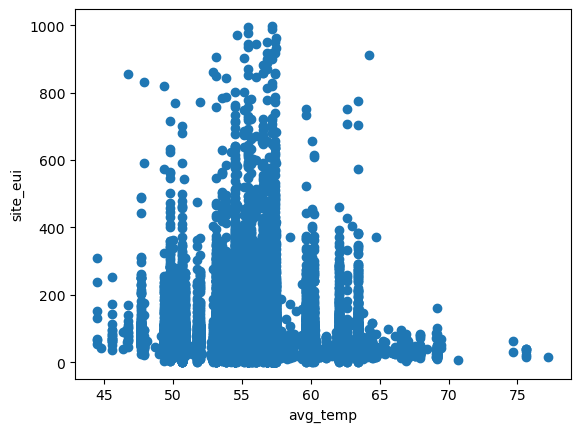

In [328]:
# Scatter Plots
plt.scatter(x=df2["avg_temp"], y=df2[target_var])   #cmap = jet, cool, hot, rainbow 

# Set the x-label and y-label
plt.xlabel('avg_temp')
plt.ylabel(target_var)

# Show the plot
plt.show()

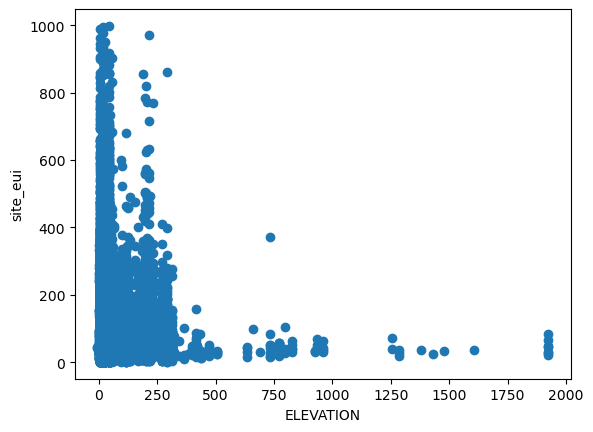

In [329]:
plt.scatter(x=df2["ELEVATION"], y=df2[target_var])   #cmap = jet, cool, hot, rainbow 

# Set the x-label and y-label
plt.xlabel('ELEVATION')
plt.ylabel(target_var)

# Show the plot
plt.show()

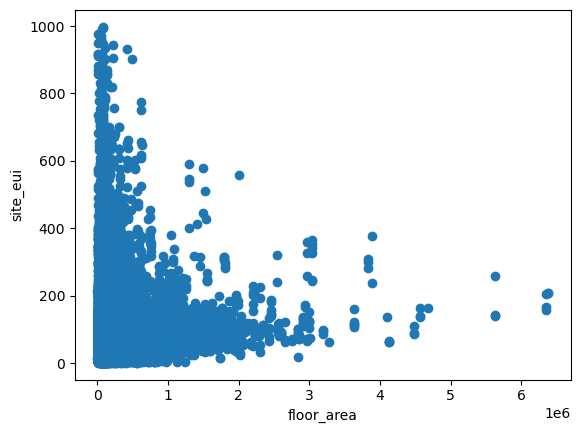

In [330]:
plt.scatter(x=df2["floor_area"], y=df2[target_var])   #cmap = jet, cool, hot, rainbow 

# Set the x-label and y-label
plt.xlabel('floor_area')
plt.ylabel(target_var)

# Show the plot
plt.show()

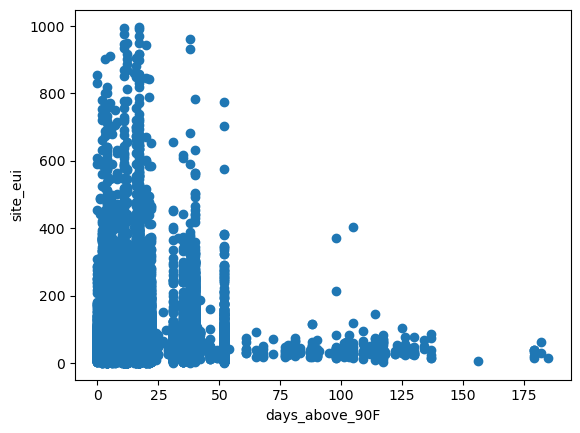

In [331]:
plt.scatter(x=df2["days_above_90F"], y=df2[target_var])   #cmap = jet, cool, hot, rainbow 

# Set the x-label and y-label
plt.xlabel('days_above_90F')
plt.ylabel(target_var)

# Show the plot
plt.show()

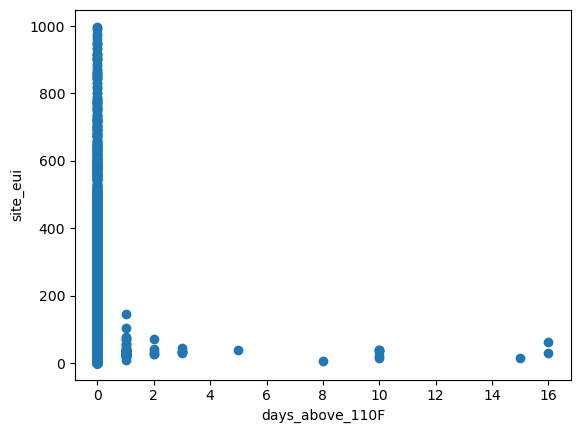

In [332]:
plt.scatter(x=df2["days_above_110F"], y=df2[target_var])   #cmap = jet, cool, hot, rainbow 

# Set the x-label and y-label
plt.xlabel('days_above_110F')
plt.ylabel(target_var)

# Show the plot
plt.show()

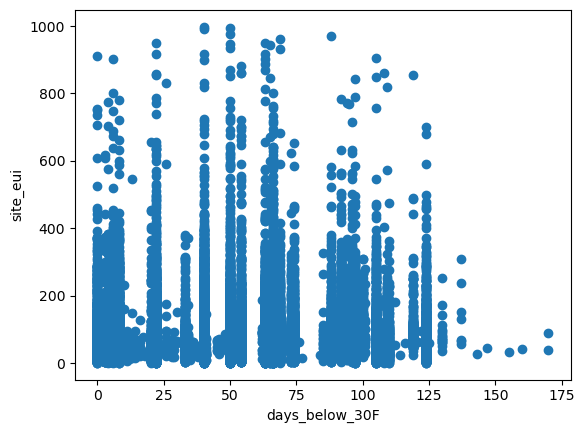

In [333]:
plt.scatter(x=df2["days_below_30F"], y=df2[target_var])   #cmap = jet, cool, hot, rainbow 

# Set the x-label and y-label
plt.xlabel('days_below_30F')
plt.ylabel(target_var)

# Show the plot
plt.show()

In [334]:
# dropping columns that have too much count compared to other values
df2=df2.drop(['State_Factor', 'days_below_0F', 'days_above_100F', 'days_above_110F'], axis=1)

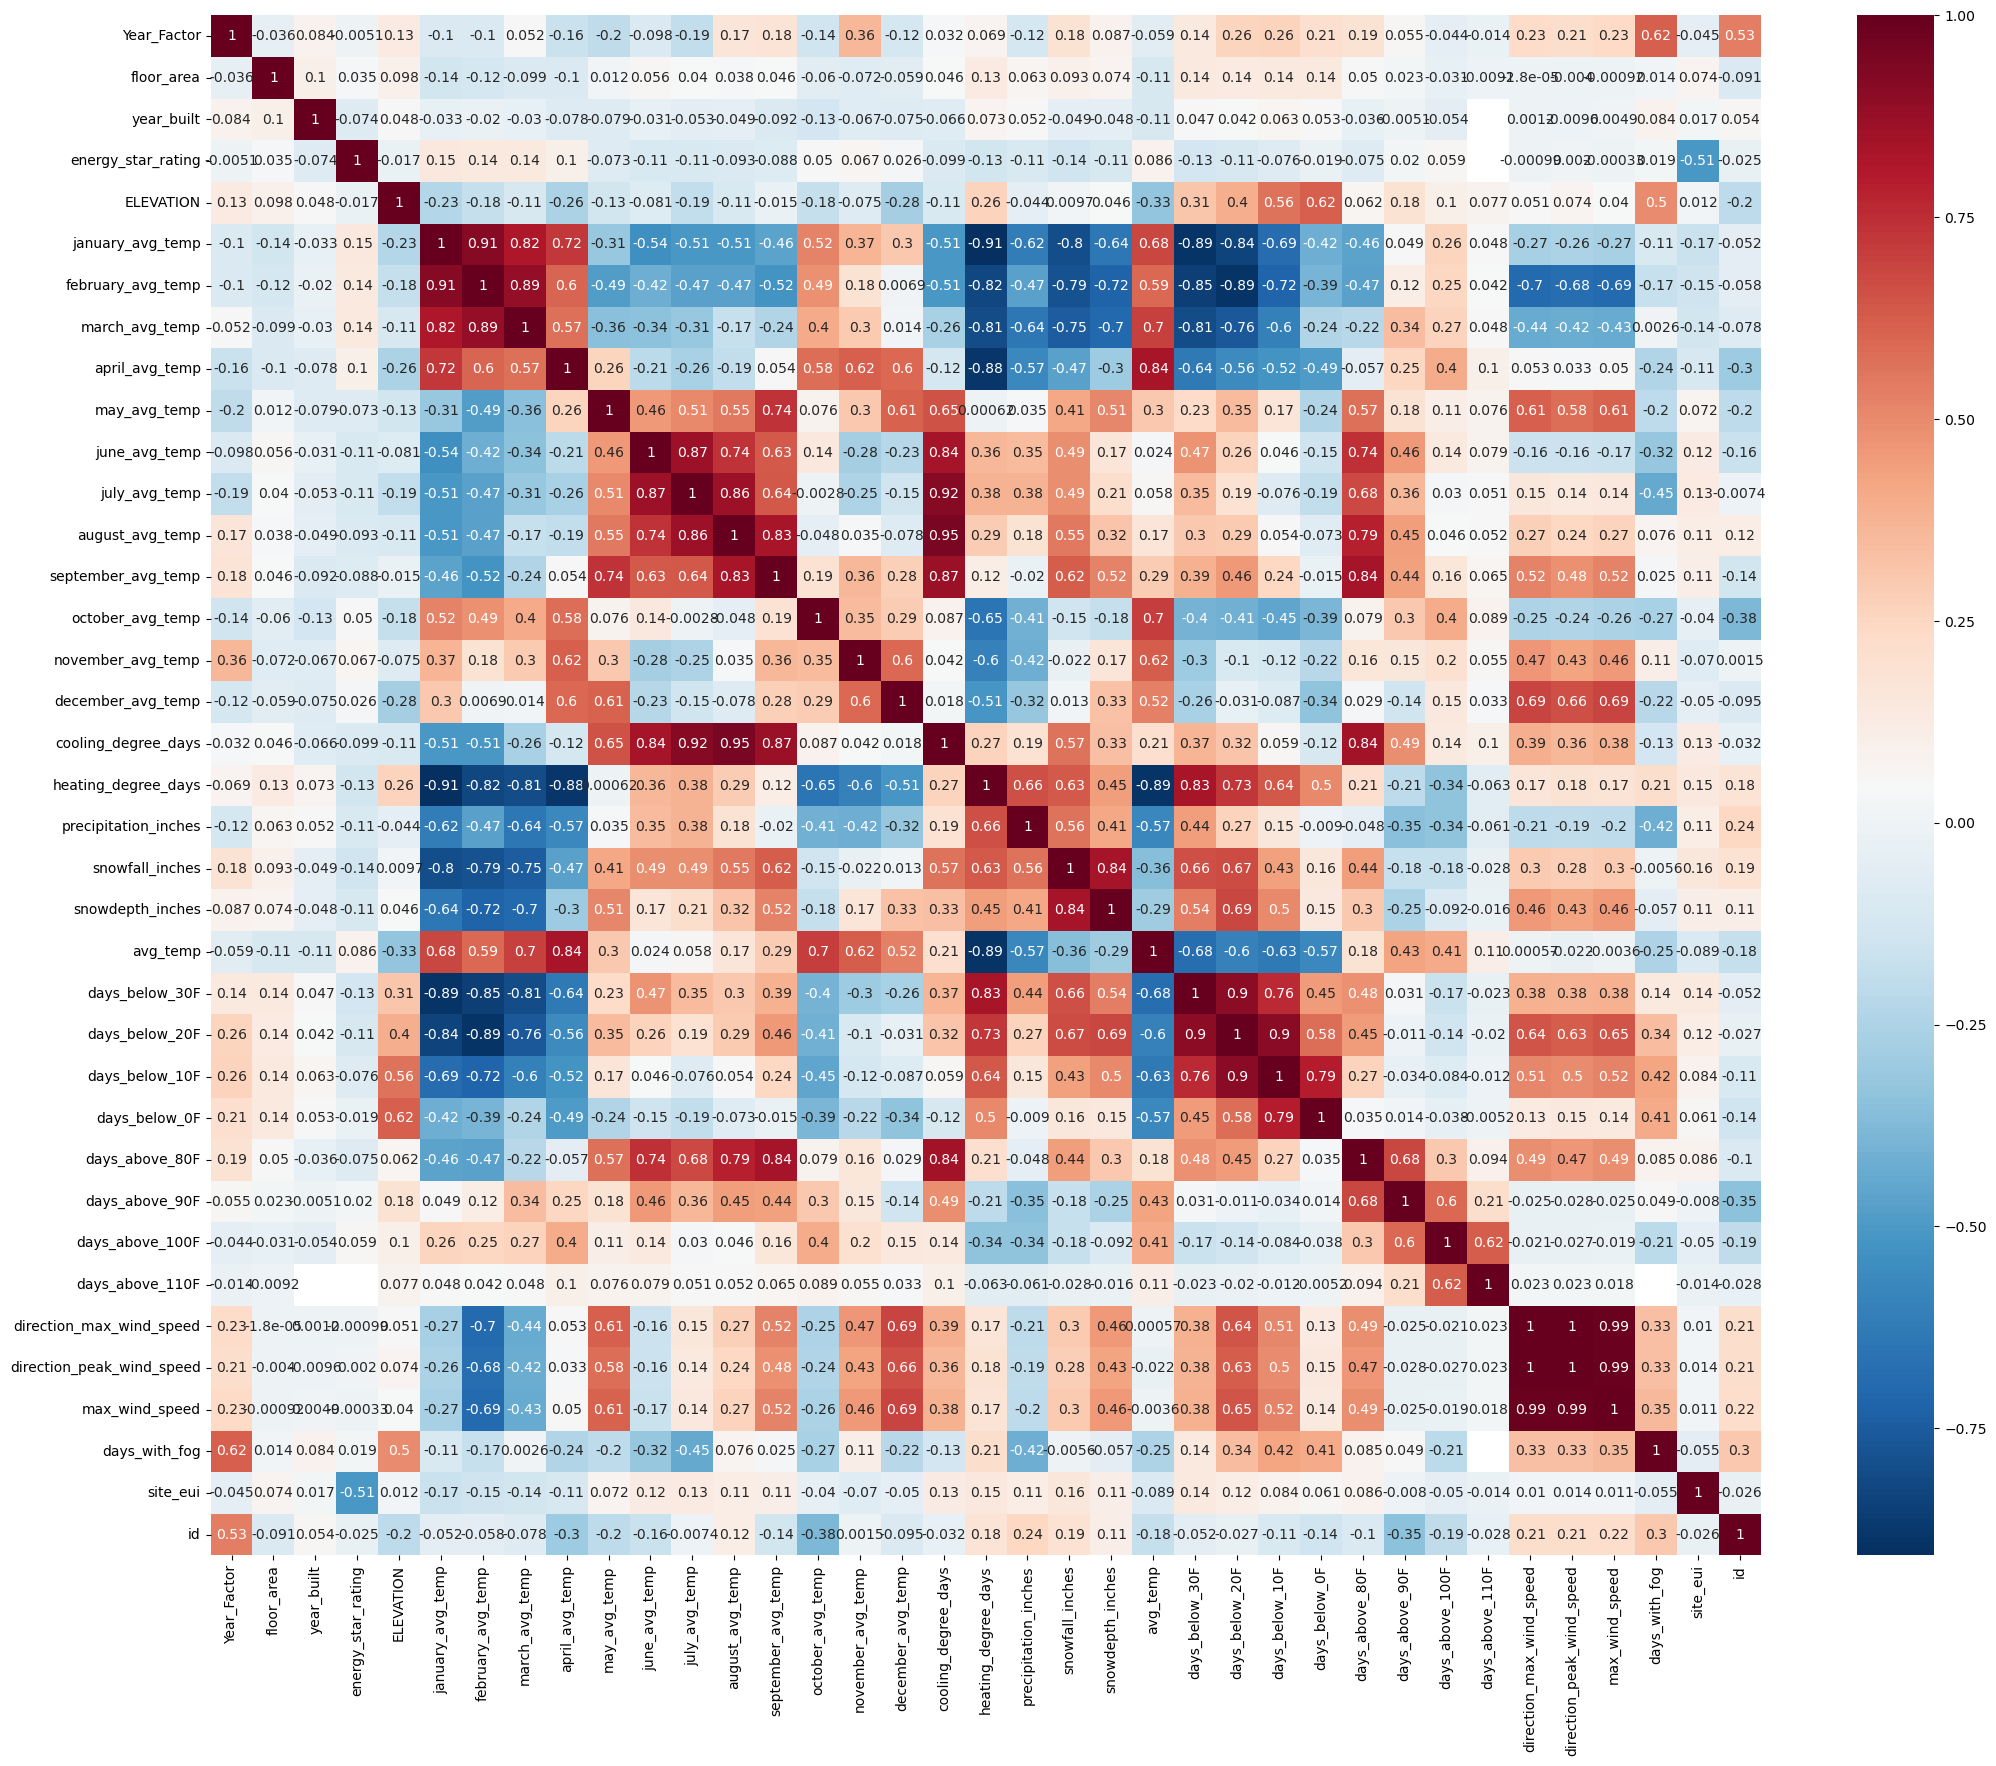

In [335]:
# Heatmap
plt.figure(figsize=(25,20))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [336]:
# dropping columns that are too similar
df2=df2.drop(['direction_max_wind_speed', 'direction_peak_wind_speed', 'days_below_20F', 'days_below_10F', 'february_avg_temp', 'march_avg_temp', 'august_avg_temp', 'september_avg_temp', 'snowdepth_inches'], axis=1)

In [337]:
col_map={
    'january_avg_temp': 'jan_feb_mar_temp',
    'july_avg_temp': 'jul_aug_sep_temp',
}
df2.rename(columns=col_map, inplace=True)

In [338]:
# Relationships between numeric features and other numeric features
# Correlations matrix
corrs = df2.corr()
corrs

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,jan_feb_mar_temp,april_avg_temp,may_avg_temp,june_avg_temp,jul_aug_sep_temp,...,precipitation_inches,snowfall_inches,avg_temp,days_below_30F,days_above_80F,days_above_90F,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.036363,0.084143,-0.005052,0.132855,-0.099628,-0.164931,-0.196895,-0.097698,-0.190931,...,-0.124418,0.182135,-0.058627,0.137436,0.185233,0.054718,0.233857,0.619227,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.100878,0.034947,0.097797,-0.137654,-0.100034,0.011626,0.056028,0.039562,...,0.062634,0.092503,-0.111303,0.136123,0.049897,0.022583,-0.000922,0.014282,0.073967,-0.090856
year_built,0.084143,0.100878,1.000000,-0.073857,0.047803,-0.032846,-0.077966,-0.079245,-0.031165,-0.052909,...,0.051926,-0.049473,-0.112555,0.046627,-0.035519,-0.005065,0.004945,0.084167,0.017162,0.053929
energy_star_rating,-0.005052,0.034947,-0.073857,1.000000,-0.016783,0.149421,0.100951,-0.072969,-0.106010,-0.107087,...,-0.109899,-0.140722,0.086425,-0.132442,-0.074993,0.019541,-0.000333,0.019387,-0.511012,-0.025448
ELEVATION,0.132855,0.097797,0.047803,-0.016783,1.000000,-0.233452,-0.258460,-0.133906,-0.080968,-0.187750,...,-0.043577,0.009727,-0.326495,0.309669,0.062014,0.184423,0.040172,0.495345,0.011798,-0.201664
jan_feb_mar_temp,-0.099628,-0.137654,-0.032846,0.149421,-0.233452,1.000000,0.717394,-0.314896,-0.538737,-0.507662,...,-0.621668,-0.799105,0.684073,-0.890095,-0.462088,0.049163,-0.271260,-0.108595,-0.167982,-0.051719
april_avg_temp,-0.164931,-0.100034,-0.077966,0.100951,-0.258460,0.717394,1.000000,0.257073,-0.212386,-0.261059,...,-0.565594,-0.471540,0.835076,-0.639140,-0.056579,0.253866,0.049735,-0.240298,-0.113008,-0.301551
may_avg_temp,-0.196895,0.011626,-0.079245,-0.072969,-0.133906,-0.314896,0.257073,1.000000,0.459987,0.507054,...,0.035471,0.412282,0.300828,0.229302,0.572365,0.182668,0.610761,-0.201244,0.072271,-0.201918
june_avg_temp,-0.097698,0.056028,-0.031165,-0.106010,-0.080968,-0.538737,-0.212386,0.459987,1.000000,0.865601,...,0.345950,0.493330,0.024295,0.471629,0.743857,0.460804,-0.166192,-0.319783,0.122019,-0.162864
jul_aug_sep_temp,-0.190931,0.039562,-0.052909,-0.107087,-0.187750,-0.507662,-0.261059,0.507054,0.865601,1.000000,...,0.378561,0.489997,0.057945,0.351300,0.676690,0.364667,0.144085,-0.445166,0.133856,-0.007374


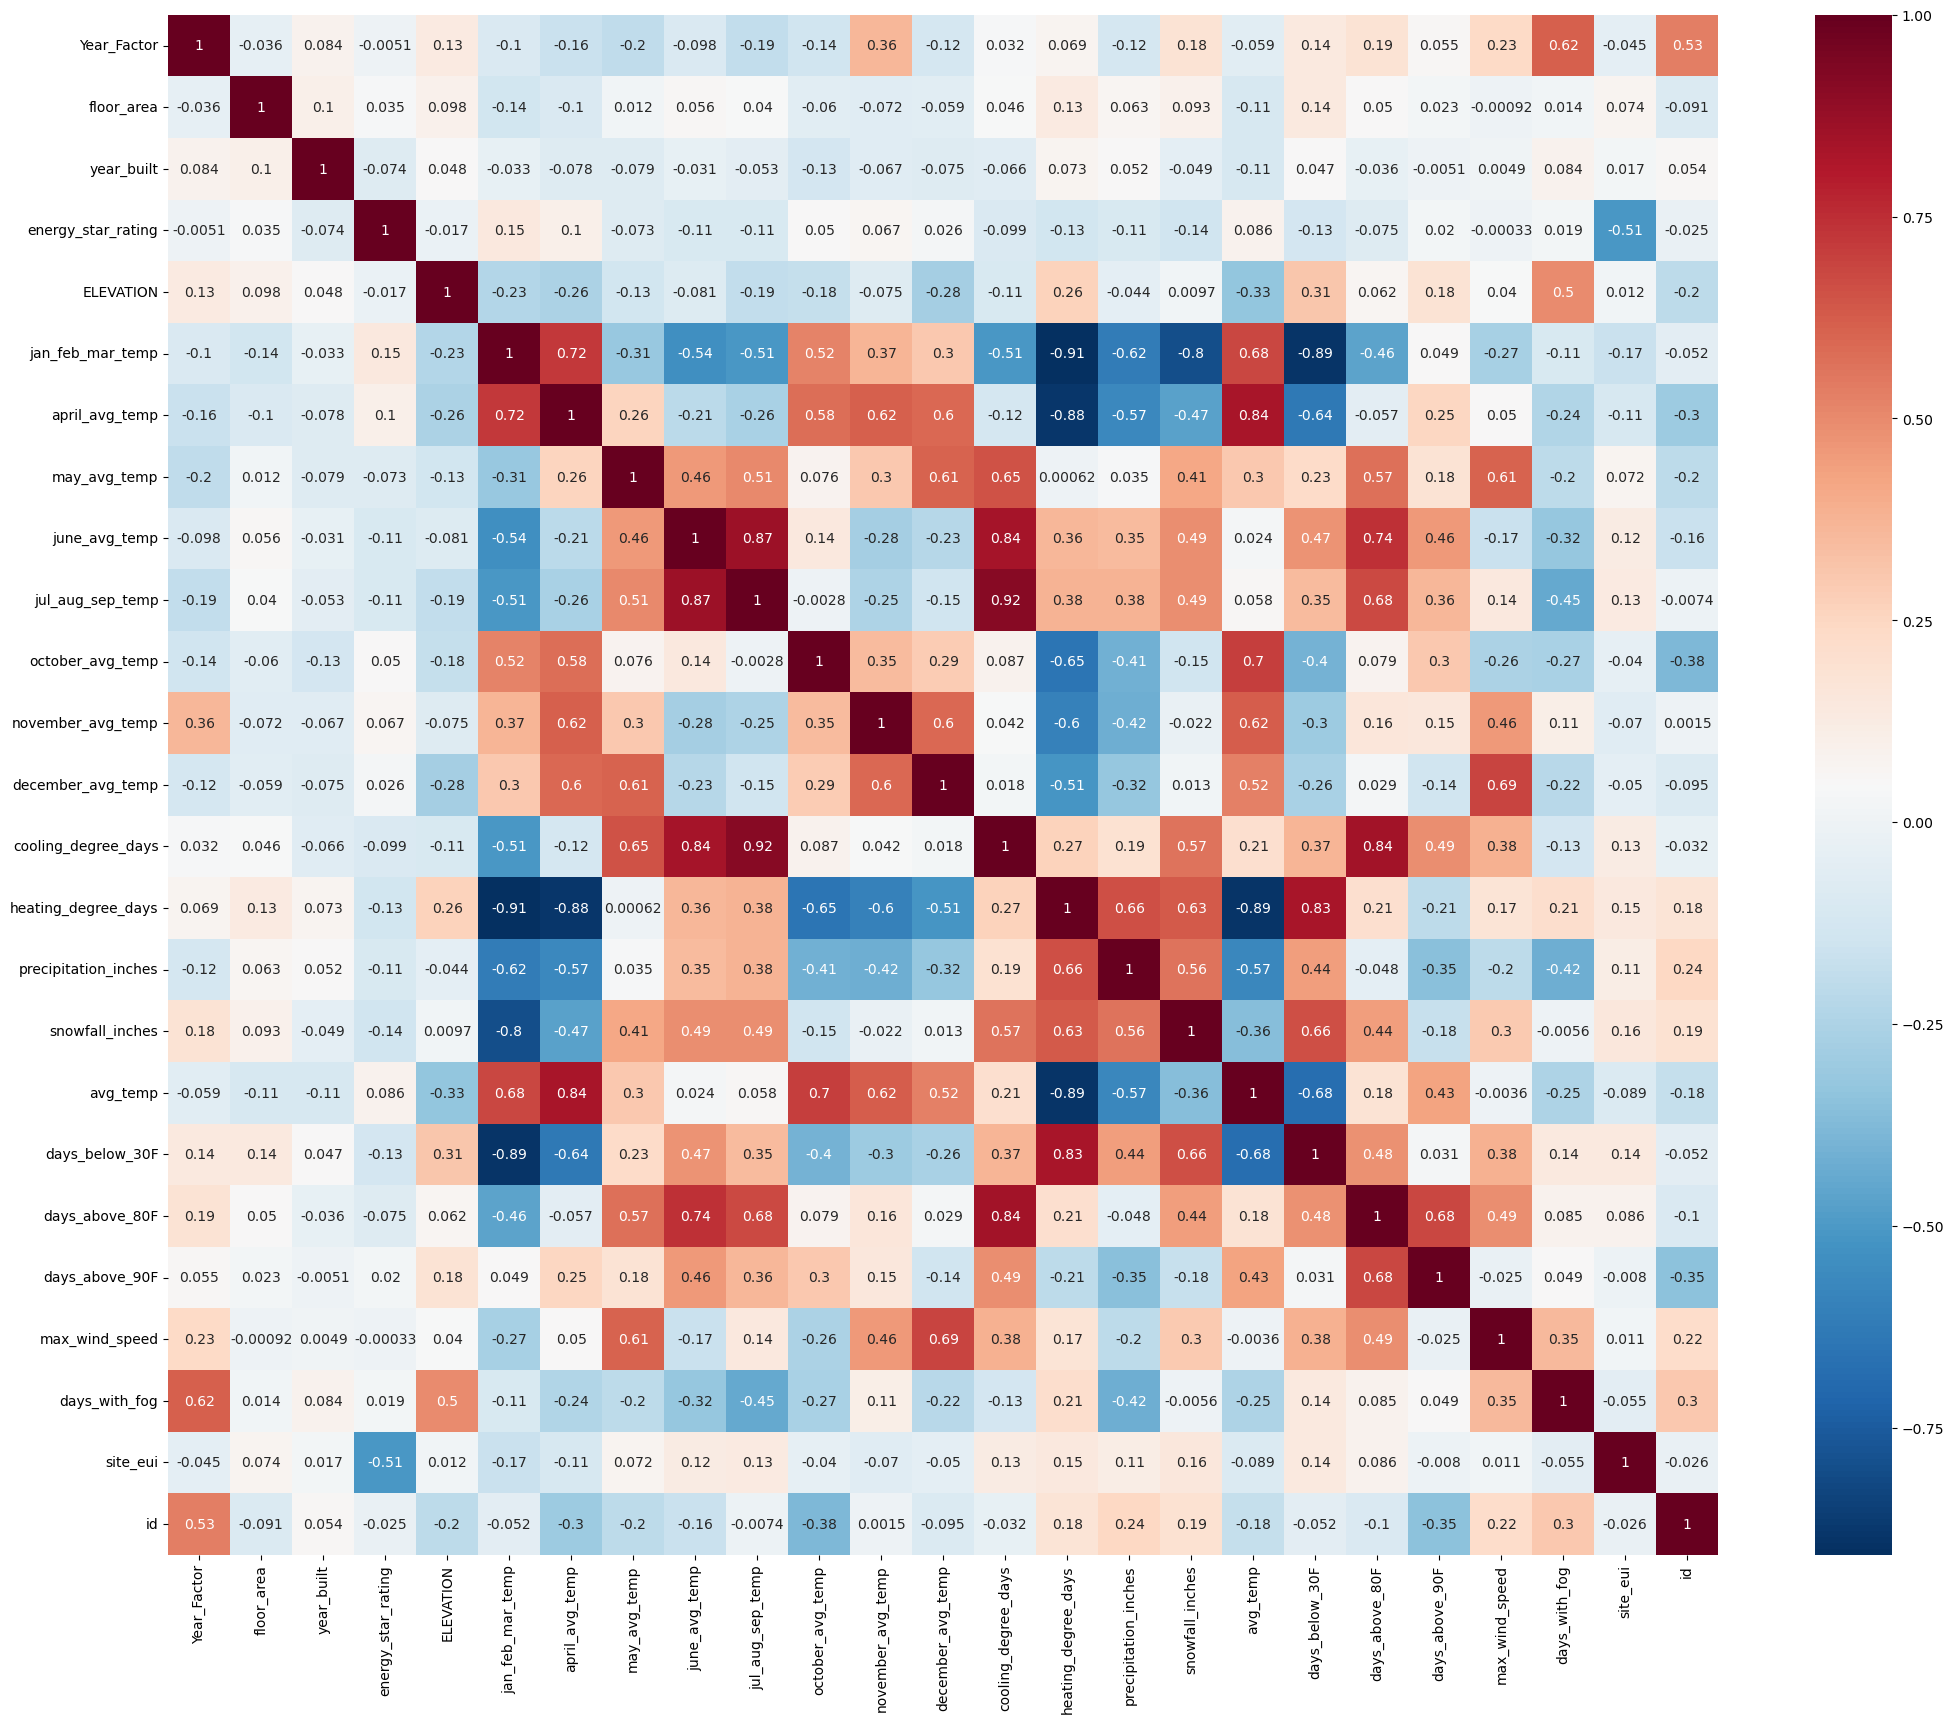

In [339]:
# Heatmap
plt.figure(figsize=(25,20))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [340]:
na_counts = df2.isna().sum()
na_counts = na_counts[na_counts != 0] # keep only columns with missing values (pandas feature)
print(na_counts.sort_values(ascending=False))

days_with_fog         45796
max_wind_speed        41082
energy_star_rating    26709
year_built             1837
dtype: int64


In [341]:
# too many missing values and seem irrelevant
df2=df2.drop(['days_with_fog', 'max_wind_speed'], axis=1)

In [342]:
corrs = df2.corr()
corrs

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,jan_feb_mar_temp,april_avg_temp,may_avg_temp,june_avg_temp,jul_aug_sep_temp,...,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,avg_temp,days_below_30F,days_above_80F,days_above_90F,site_eui,id
Year_Factor,1.000000,-0.036363,0.084143,-0.005052,0.132855,-0.099628,-0.164931,-0.196895,-0.097698,-0.190931,...,0.032302,0.068750,-0.124418,0.182135,-0.058627,0.137436,0.185233,0.054718,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.100878,0.034947,0.097797,-0.137654,-0.100034,0.011626,0.056028,0.039562,...,0.045823,0.130198,0.062634,0.092503,-0.111303,0.136123,0.049897,0.022583,0.073967,-0.090856
year_built,0.084143,0.100878,1.000000,-0.073857,0.047803,-0.032846,-0.077966,-0.079245,-0.031165,-0.052909,...,-0.065614,0.073192,0.051926,-0.049473,-0.112555,0.046627,-0.035519,-0.005065,0.017162,0.053929
energy_star_rating,-0.005052,0.034947,-0.073857,1.000000,-0.016783,0.149421,0.100951,-0.072969,-0.106010,-0.107087,...,-0.098710,-0.133304,-0.109899,-0.140722,0.086425,-0.132442,-0.074993,0.019541,-0.511012,-0.025448
ELEVATION,0.132855,0.097797,0.047803,-0.016783,1.000000,-0.233452,-0.258460,-0.133906,-0.080968,-0.187750,...,-0.109070,0.264434,-0.043577,0.009727,-0.326495,0.309669,0.062014,0.184423,0.011798,-0.201664
jan_feb_mar_temp,-0.099628,-0.137654,-0.032846,0.149421,-0.233452,1.000000,0.717394,-0.314896,-0.538737,-0.507662,...,-0.505941,-0.907366,-0.621668,-0.799105,0.684073,-0.890095,-0.462088,0.049163,-0.167982,-0.051719
april_avg_temp,-0.164931,-0.100034,-0.077966,0.100951,-0.258460,0.717394,1.000000,0.257073,-0.212386,-0.261059,...,-0.119025,-0.884073,-0.565594,-0.471540,0.835076,-0.639140,-0.056579,0.253866,-0.113008,-0.301551
may_avg_temp,-0.196895,0.011626,-0.079245,-0.072969,-0.133906,-0.314896,0.257073,1.000000,0.459987,0.507054,...,0.650164,0.000616,0.035471,0.412282,0.300828,0.229302,0.572365,0.182668,0.072271,-0.201918
june_avg_temp,-0.097698,0.056028,-0.031165,-0.106010,-0.080968,-0.538737,-0.212386,0.459987,1.000000,0.865601,...,0.837204,0.362745,0.345950,0.493330,0.024295,0.471629,0.743857,0.460804,0.122019,-0.162864
jul_aug_sep_temp,-0.190931,0.039562,-0.052909,-0.107087,-0.187750,-0.507662,-0.261059,0.507054,0.865601,1.000000,...,0.917971,0.376250,0.378561,0.489997,0.057945,0.351300,0.676690,0.364667,0.133856,-0.007374


In [343]:
# Check the correlations between 'age' and other variables
corr_matrix = df2.corr()
corr_matrix['energy_star_rating'].sort_values(ascending=False)

energy_star_rating      1.000000
jan_feb_mar_temp        0.149421
april_avg_temp          0.100951
avg_temp                0.086425
november_avg_temp       0.067282
october_avg_temp        0.049684
floor_area              0.034947
december_avg_temp       0.026105
days_above_90F          0.019541
Year_Factor            -0.005052
ELEVATION              -0.016783
id                     -0.025448
may_avg_temp           -0.072969
year_built             -0.073857
days_above_80F         -0.074993
cooling_degree_days    -0.098710
june_avg_temp          -0.106010
jul_aug_sep_temp       -0.107087
precipitation_inches   -0.109899
days_below_30F         -0.132442
heating_degree_days    -0.133304
snowfall_inches        -0.140722
site_eui               -0.511012
Name: energy_star_rating, dtype: float64

In [344]:
# KNN Imputation - ~30% missing values
# Identify the column to impute
col_to_impute = 'energy_star_rating'

# Create an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputation to the column
df2[col_to_impute] = imputer.fit_transform(df2[[col_to_impute]])

In [345]:
# Using mode imputation on 'year_built' coz it has only 2% missing data
impute_cols = ['year_built']
for feat in impute_cols:
    mode = df2[feat].mode()[0]
    df2[feat].fillna(mode, inplace=True)

In [346]:
hypothesis_df = df2.copy(deep=True)

In [347]:
((hypothesis_df.groupby(['building_class']).size() / hypothesis_df["building_class"].count()) * 100).add_prefix('SEI - Building Class(in %) by ')

building_class
SEI - Building Class(in %) by Commercial     42.503003
SEI - Building Class(in %) by Residential    57.496997
dtype: float64

In [348]:
# Split dataset into x (input) and y(output)
x = df2.drop('site_eui', axis=1)
y = df2['site_eui']

In [349]:
# Check the correlations between 'age' and other variables
corr_matrix = df2.corr()
corr_matrix['site_eui'].sort_values(ascending=False)

site_eui                1.000000
snowfall_inches         0.157284
heating_degree_days     0.147861
days_below_30F          0.139811
jul_aug_sep_temp        0.133856
cooling_degree_days     0.125004
june_avg_temp           0.122019
precipitation_inches    0.113558
days_above_80F          0.086347
floor_area              0.073967
may_avg_temp            0.072271
year_built              0.018689
ELEVATION               0.011798
days_above_90F         -0.007980
id                     -0.026500
october_avg_temp       -0.040162
Year_Factor            -0.045179
december_avg_temp      -0.050328
november_avg_temp      -0.069882
avg_temp               -0.089201
april_avg_temp         -0.113008
jan_feb_mar_temp       -0.167982
energy_star_rating     -0.379170
Name: site_eui, dtype: float64

In [350]:
df2.shape


(75757, 25)

In [351]:
x_test = pd.read_csv("/kaggle/input/widsdatathon2022/test.csv")

In [352]:
x_test.shape

(9705, 63)

In [353]:
df2.columns


Index(['Year_Factor', 'building_class', 'facility_type', 'floor_area',
       'year_built', 'energy_star_rating', 'ELEVATION', 'jan_feb_mar_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'jul_aug_sep_temp',
       'october_avg_temp', 'november_avg_temp', 'december_avg_temp',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'avg_temp', 'days_below_30F', 'days_above_80F',
       'days_above_90F', 'site_eui', 'id'],
      dtype='object')

In [354]:
x_test.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [355]:
# Split dataset into x (input) and y(output)
x = df2.drop('site_eui', axis=1)
y = df2['site_eui']

In [356]:
from sklearn.preprocessing import LabelEncoder

# Create a list of common categorical features
common_categorical_features = list(set(x.select_dtypes(include=['object']).columns) &
                                    set(x_test.select_dtypes(include=['object']).columns))

# Rename columns in x
col_map = {
    'january_avg_temp': 'jan_feb_mar_temp',
    'july_avg_temp': 'jul_aug_sep_temp',
}
x_test = x_test.rename(columns=col_map)

# Drop columns in x_test that are not present in x
x_test = x_test[x.columns]

# Encode the categorical features in both dataframes
le = LabelEncoder()
for feature in common_categorical_features:
    x[feature] = le.fit_transform(x[feature])
    x_test[feature] = le.transform(x_test[feature])


In [359]:
from sklearn.impute import SimpleImputer

# Create an Imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(x)

# Replace missing values in x_test with mean of corresponding column
x_test = imputer.transform(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


In [371]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(x, y)

# Make predictions
predictions = model.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [376]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=[target_var])

x_test_df = pd.DataFrame(pd.read_csv("/kaggle/input/widsdatathon2022/test.csv"))

# Concatenate 'ID' column with predictions column
output = pd.concat([x_test_df['id'], predictions_df], axis=1)
output.columns = ['id', 'Prediction']

# Export to CSV file
output.to_csv('predictions.csv', index=False)